In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline  

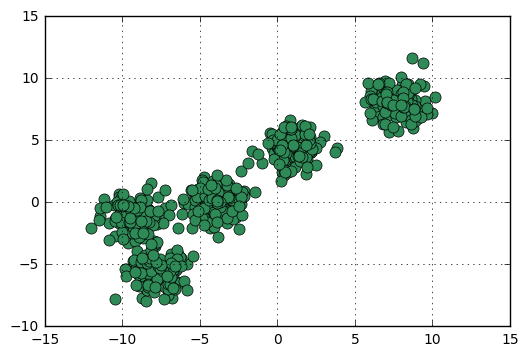

In [14]:
# Let's generate 600 random observations with normal distribution
# and 5 centers (means)
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=600, n_features=2, centers=5,
                 cluster_std=1, random_state=3 )

fig, ax = plt.subplots()
ax.plot(x[:,0],x[:,1], marker='o',c='seagreen', ms=8, lw=0)
plt.grid() 

In [15]:
x

array([[-9.46801947, -1.70183517],
       [ 8.60257606,  8.06199401],
       [-4.79701379, -0.84560402],
       ..., 
       [-8.74258228, -4.50552826],
       [-8.77318484, -1.51956357],
       [ 7.98755913,  7.84989714]])

In [16]:
# Let's creat a model to fit the data points
from sklearn.cluster import KMeans

# since we have generated our own data we know k=5
KM_model = KMeans(n_clusters=5, random_state=0)
KM_model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [17]:
centroids = KM_model.cluster_centers_
KM_model.cluster_centers_

array([[ 7.82245556,  8.06663956],
       [-9.23774973, -1.08430495],
       [-7.67898131, -5.60470315],
       [ 0.9387585 ,  4.29843952],
       [-4.09690757,  0.13966778]])

In [18]:
clusters = KM_model.labels_
KM_model.labels_

array([1, 0, 4, 4, 0, 3, 1, 1, 1, 2, 1, 1, 4, 4, 4, 2, 0, 2, 1, 0, 3, 0, 1,
       3, 0, 4, 2, 1, 3, 1, 1, 3, 4, 3, 2, 0, 3, 4, 3, 4, 0, 2, 2, 4, 1, 3,
       1, 3, 1, 0, 4, 0, 3, 4, 0, 3, 0, 1, 1, 4, 1, 2, 2, 0, 3, 2, 1, 0, 3,
       4, 1, 3, 4, 1, 0, 3, 2, 2, 0, 2, 1, 2, 0, 4, 1, 3, 0, 2, 1, 2, 0, 3,
       2, 4, 2, 1, 2, 4, 0, 4, 3, 4, 3, 0, 0, 0, 3, 2, 0, 0, 2, 3, 4, 1, 3,
       1, 3, 2, 0, 0, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 0, 1, 1, 4, 4, 0, 1, 3,
       4, 0, 3, 3, 3, 2, 2, 3, 4, 4, 0, 3, 4, 4, 4, 1, 3, 0, 2, 4, 0, 2, 2,
       3, 1, 2, 0, 4, 0, 0, 4, 4, 0, 3, 3, 2, 4, 3, 1, 4, 2, 4, 0, 3, 1, 2,
       2, 4, 1, 3, 2, 4, 2, 0, 2, 3, 3, 3, 2, 2, 2, 2, 1, 0, 3, 4, 3, 1, 3,
       2, 0, 4, 0, 0, 2, 2, 2, 3, 0, 3, 3, 4, 0, 2, 2, 1, 2, 4, 4, 1, 3, 4,
       4, 1, 1, 0, 2, 4, 4, 2, 2, 1, 1, 4, 1, 3, 1, 3, 4, 4, 1, 0, 4, 3, 1,
       2, 1, 3, 2, 3, 1, 2, 0, 2, 4, 3, 0, 4, 1, 0, 1, 1, 3, 0, 2, 1, 4, 2,
       4, 1, 1, 2, 0, 3, 0, 1, 1, 3, 1, 2, 2, 4, 1, 3, 2, 4, 3, 0, 0, 0, 0,
       2, 2,

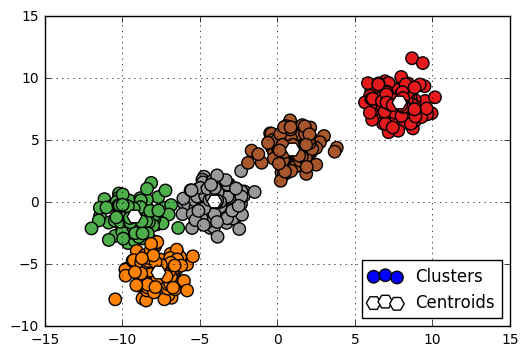

In [19]:
#Let's plot the clusters generated by the model
fig, ax = plt.subplots()
ax.scatter(x[:,0],x[:,1], marker='o',c=clusters, s=80, 
           cmap='Set1', label ='Clusters')
ax.scatter(centroids[:,0],centroids[:,1],marker='H', s=110, 
           c='white', label='Centroids' )
plt.grid()
plt.legend(loc=4,)

In [20]:
from sklearn.metrics import silhouette_samples

# to find the silhouette coefficient of every observation
#(measured by euclidean distance by default)
sil_coef=silhouette_samples(x,clusters)
sil_coef

array([ 0.69447886,  0.83048724,  0.62567642,  0.3549017 ,  0.8341171 ,
        0.67926329,  0.69162779,  0.44169701,  0.22669595,  0.4614391 ,
        0.45840283,  0.63500886,  0.65716309,  0.72952993,  0.66507429,
        0.67534136,  0.82497281,  0.4602552 ,  0.74671046,  0.8298624 ,
        0.71332668,  0.82599163,  0.73056877,  0.79525011,  0.81970064,
        0.60274579,  0.21785004,  0.69991922,  0.77111636,  0.67174625,
        0.60317144,  0.74141965,  0.64835867,  0.55052813,  0.63043696,
        0.75013377,  0.76937299,  0.68907446,  0.77032035,  0.52918522,
        0.66010287,  0.69280686,  0.61499106,  0.75618335,  0.64028675,
        0.77945121,  0.64608244,  0.69640179,  0.67413646,  0.83570985,
        0.66262202,  0.70070007,  0.80863413,  0.6758538 ,  0.76169254,
        0.54344528,  0.81343801,  0.71628213,  0.62628389,  0.7015228 ,
        0.7101985 ,  0.73108994,  0.61739232,  0.80066793,  0.61650843,
        0.70353181,  0.35016077,  0.77098854,  0.77854302,  0.72

# -SILHOUETTE PLOT-

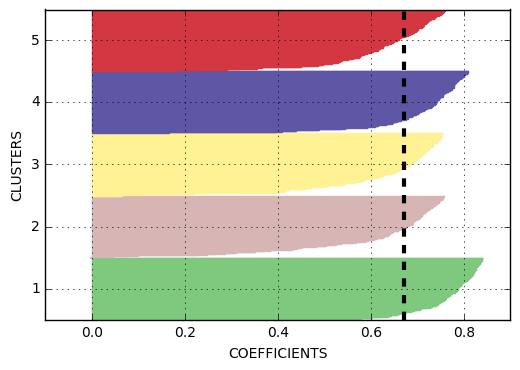

In [21]:
# to set the labels (0 to 4) 
list_labels=np.unique(clusters)

# to set number of clusters (5)
clusters_total=list_labels.shape[0]

y_low,y_up=0,0 #upper and lower boundaries for bars (barplot)
ticks =[]

#to plot the silhouettes, 1 by 1 through iteration
for a,b in enumerate(list_labels):
    
    #to create a group of coefficients per each cluster label 
    val_c = sil_coef[clusters==b]
    
    #to sort the coefficients in the group
    val_c.sort()
    
    #to increase the number of values of y axis after every iteration
    y_up += len(val_c)
    
    #to generate different colors after each iteration
    cl =cm.Accent(X=a/clusters_total)
    
    #to plot the cluster (horizontal bar graph)
    plt.barh(bottom=range(y_low, y_up), 
             width=val_c, 
             height=1.0,
            edgecolor=cl)

    ticks.append((y_low+y_up)/2)
    
    #to raise the lower boundary for next iteration
    y_low += len(val_c)

#------------------------------------------------------
#to get the coefficients average and plot it as a line    
coef_avg = np.mean(sil_coef) 
plt.axvline(coef_avg, color="black", ls='--', lw=3)

#to modify the ticks
plt.yticks(ticks, list_labels+1)

plt.ylabel('CLUSTERS')
plt.xlabel('COEFFICIENTS')
plt.grid()

# -----------------------------------------------------------------

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline  
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=600, n_features=2, centers=5,
                 cluster_std=1, random_state=3 )

#-----------------------------------------------------------

#Let's create the model with k=4
KM_model = KMeans(n_clusters=4, init='random', random_state=0)
KM_model.fit(x)
centroids = KM_model.cluster_centers_
clusters = KM_model.labels_

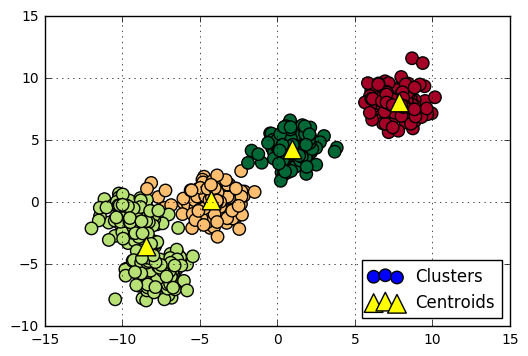

In [23]:
#Let's plot the clusters generated by the model
fig, ax = plt.subplots()
ax.scatter(x[:,0],x[:,1], marker='o',c=clusters, s=80, 
           cmap='RdYlGn', label ='Clusters')
ax.scatter(centroids[:,0],centroids[:,1],marker='^', s=180, 
           c='yellow', label='Centroids' )
plt.grid()
plt.legend(loc=4,)

In [24]:
#Let's generate the coefficients
sil_coef=silhouette_samples(x,clusters)

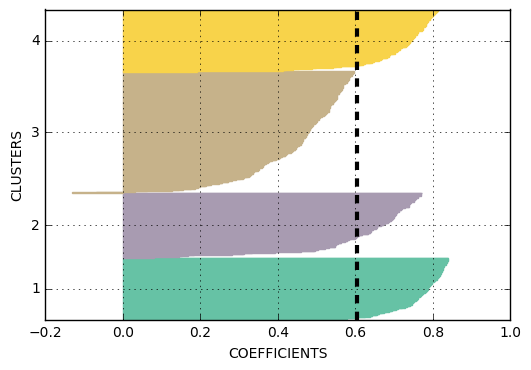

In [25]:
#Let's plot the results
list_labels=np.unique(clusters)
clusters_total=list_labels.shape[0]
y_low,y_up=0,0 
ticks =[]

for a,b in enumerate(list_labels):
    
    val_c = sil_coef[clusters==b]
    val_c.sort()
    y_up += len(val_c)
    cl =cm.Set2(X=a/clusters_total)
    plt.barh(bottom=range(y_low, y_up), 
             width=val_c, 
             height=1.0,
            edgecolor=cl)
    ticks.append((y_low+y_up)/2)
    y_low += len(val_c)

coef_avg = np.mean(sil_coef) 
plt.axvline(coef_avg, color="black", ls='--', lw=3)

plt.yticks(ticks, list_labels+1)

plt.ylabel('CLUSTERS')
plt.xlabel('COEFFICIENTS')
plt.grid()

In [26]:
sil_coef[sil_coef<0]

array([-0.13044773, -0.06842284])